In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Database Reading and Manipulation
import pandas as pd

# Linear Algebra
import numpy as np

# Time
import time

# Random and os for reproducibility
import random
import os

# Model Selection
from sklearn.model_selection import train_test_split

# Modeling
import tensorflow as tf

# Best model save
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Processing
from sklearn.preprocessing import StandardScaler

# Pipeline
from sklearn.pipeline import Pipeline

# Data imputation
from sklearn.impute import SimpleImputer

# Making keras compatible with scikit learn api
# https://scikit-learn.org/stable/developers/develop.html
from sklearn.base import RegressorMixin

# Custom modules
## Model selection
from src.cross_validation.blocking_time_series_split import BlockingTimeSeriesSplit

## Function to print scores
from src.utils.print_scores import print_scores

## Function to calculate score regression metrics
from src.utils.score_regression_metrics import score_regression_metrics

## Function to fill the results metric dict
from src.utils.fill_results_dict import fill_results_dict

from pickle import dump

2024-09-06 23:08:19.739448: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-06 23:08:19.744380: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-06 23:08:19.842963: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-06 23:08:19.845031: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-06 23:08:21.642867: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

<IPython.core.display.Javascript object>

# Functions and definitions

In [3]:
class MLP1:
    def __init__(self, callbacks=None, validation_split=0.0, verbose=0):
        self.model = self.get_model()
        self.batch_size = 64
        self.epochs = 300
        self.verbose = verbose
        self.callbacks = callbacks
        self.validation_split = validation_split

    def fit(self, X=None, y=None):
        self.history = self.model.fit(
            X,
            y,
            batch_size=self.batch_size,
            epochs=self.epochs,
            verbose=self.verbose,
            callbacks=self.callbacks,
            validation_split=self.validation_split,
        )

    def predict(self, X=None):
        return self.model.predict(X, verbose=self.verbose)

    def get_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(units=128, activation="relu")),
        model.add(tf.keras.layers.Dense(units=64, activation="relu")),
        model.add(tf.keras.layers.Dropout(rate=0.10))

        model.add(tf.keras.layers.Dense(units=1))
        model.compile(
            optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
            loss="mse",
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
        )
        return model

<IPython.core.display.Javascript object>

In [4]:
class MLP2:
    def __init__(self, callbacks=None, validation_split=0.0, verbose=0):
        self.model = self.get_model()
        self.batch_size = 64
        self.epochs = 300
        self.verbose = verbose
        self.callbacks = callbacks
        self.validation_split = validation_split

    def fit(self, X=None, y=None):
        self.history = self.model.fit(
            X,
            y,
            batch_size=self.batch_size,
            epochs=self.epochs,
            verbose=self.verbose,
            callbacks=self.callbacks,
            validation_split=self.validation_split,
        )

    def predict(self, X=None):
        return self.model.predict(X, verbose=self.verbose)

    def get_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(units=128, activation="elu")),
        model.add(tf.keras.layers.Dense(units=64, activation="elu")),
        model.add(tf.keras.layers.Dropout(rate=0.10))

        model.add(tf.keras.layers.Dense(units=1))
        model.compile(
            optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
            loss="mse",
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
        )
        return model

<IPython.core.display.Javascript object>

In [5]:
class MLP3:
    def __init__(self, callbacks=None, validation_split=0.0, verbose=0):
        self.model = self.get_model()
        self.batch_size = 64
        self.epochs = 300
        self.verbose = verbose
        self.callbacks = callbacks
        self.validation_split = validation_split

    def fit(self, X=None, y=None):
        self.history = self.model.fit(
            X,
            y,
            batch_size=self.batch_size,
            epochs=self.epochs,
            verbose=self.verbose,
            callbacks=self.callbacks,
            validation_split=self.validation_split,
        )

    def predict(self, X=None):
        return self.model.predict(X, verbose=self.verbose)

    def get_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(units=128, activation="relu")),
        model.add(tf.keras.layers.Dropout(rate=0.10))
        model.add(tf.keras.layers.Dense(units=64, activation="relu")),
        model.add(tf.keras.layers.Dropout(rate=0.10))
        model.add(tf.keras.layers.Dense(units=32, activation="relu")),
        model.add(tf.keras.layers.Dropout(rate=0.10))
        model.add(tf.keras.layers.Dense(units=16, activation="relu")),
        model.add(tf.keras.layers.Dropout(rate=0.10))
        model.add(tf.keras.layers.Dense(units=1))
        model.compile(
            optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
            loss="mse",
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
        )
        return model

<IPython.core.display.Javascript object>

In [6]:
class MLP4:
    def __init__(self, callbacks=None, validation_split=0.0, verbose=0):
        self.model = self.get_model()
        self.batch_size = 64
        self.epochs = 300
        self.verbose = verbose
        self.callbacks = callbacks
        self.validation_split = validation_split

    def fit(self, X=None, y=None):
        self.history = self.model.fit(
            X,
            y,
            batch_size=self.batch_size,
            epochs=self.epochs,
            verbose=self.verbose,
            callbacks=self.callbacks,
            validation_split=self.validation_split,
        )

    def predict(self, X=None):
        return self.model.predict(X, verbose=self.verbose)

    def get_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(units=256, activation="relu")),
        model.add(tf.keras.layers.Dropout(rate=0.25))
        model.add(tf.keras.layers.Dense(units=128, activation="relu")),
        model.add(tf.keras.layers.Dense(units=64, activation="relu")),
        model.add(tf.keras.layers.Dropout(rate=0.10))
        model.add(tf.keras.layers.Dense(units=32, activation="relu")),
        model.add(tf.keras.layers.Dense(units=16, activation="relu")),
        model.add(tf.keras.layers.Dropout(rate=0.10))
        model.add(tf.keras.layers.Dense(units=1))
        model.compile(
            optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
            loss="mse",
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
        )
        return model

<IPython.core.display.Javascript object>

In [7]:
class MLP5:
    def __init__(self, callbacks=None, validation_split=0.0, verbose=0):
        self.model = self.get_model()
        self.batch_size = 64
        self.epochs = 300
        self.verbose = verbose
        self.callbacks = callbacks
        self.validation_split = validation_split

    def fit(self, X=None, y=None):
        self.history = self.model.fit(
            X,
            y,
            batch_size=self.batch_size,
            epochs=self.epochs,
            verbose=self.verbose,
            callbacks=self.callbacks,
            validation_split=self.validation_split,
        )

    def predict(self, X=None):
        return self.model.predict(X, verbose=self.verbose)

    def get_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(units=256, activation="selu")),
        model.add(tf.keras.layers.Dropout(rate=0.25))
        model.add(tf.keras.layers.Dense(units=128, activation="selu")),
        model.add(tf.keras.layers.Dense(units=64, activation="selu")),
        model.add(tf.keras.layers.Dropout(rate=0.10))
        model.add(tf.keras.layers.Dense(units=32, activation="selu")),
        model.add(tf.keras.layers.Dense(units=16, activation="selu")),
        model.add(tf.keras.layers.Dropout(rate=0.10))
        model.add(tf.keras.layers.Dense(units=1))
        model.compile(
            optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
            loss="mse",
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
        )
        return model

<IPython.core.display.Javascript object>

In [8]:
class MLP6:
    def __init__(self, callbacks=None, validation_split=0.0, verbose=0):
        self.model = self.get_model()
        self.batch_size = 64
        self.epochs = 300
        self.verbose = verbose
        self.callbacks = callbacks
        self.validation_split = validation_split

    def fit(self, X=None, y=None):
        self.history = self.model.fit(
            X,
            y,
            batch_size=self.batch_size,
            epochs=self.epochs,
            verbose=self.verbose,
            callbacks=self.callbacks,
            validation_split=self.validation_split,
        )

    def predict(self, X=None):
        return self.model.predict(X, verbose=self.verbose)

    def get_model(self):
        model = tf.keras.Sequential()

        # First Dense layer with Batch Normalization
        model.add(tf.keras.layers.Dense(units=256, activation="selu"))
        model.add(tf.keras.layers.BatchNormalization())  # Add BatchNormalization
        model.add(tf.keras.layers.Dropout(rate=0.25))
        # Subsequent Dense layers with Batch Normalization
        model.add(tf.keras.layers.Dense(units=128, activation="selu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dense(units=64, activation="selu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(rate=0.10))
        model.add(tf.keras.layers.Dense(units=32, activation="selu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dense(units=16, activation="selu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(rate=0.10))
        model.add(tf.keras.layers.Dense(units=1))

        model.compile(
            optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
            loss="mse",
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
        )

        return model

<IPython.core.display.Javascript object>

In [9]:
class MLP7:
    def __init__(self, callbacks=None, validation_split=0.0, verbose=0):
        self.model = self.get_model()
        self.batch_size = 64
        self.epochs = 300
        self.verbose = verbose
        self.callbacks = callbacks
        self.validation_split = validation_split

    def fit(self, X=None, y=None):
        self.history = self.model.fit(
            X,
            y,
            batch_size=self.batch_size,
            epochs=self.epochs,
            verbose=self.verbose,
            callbacks=self.callbacks,
            validation_split=self.validation_split,
        )

    def predict(self, X=None):
        return self.model.predict(X, verbose=self.verbose)

    def get_model(self):
        model = tf.keras.Sequential()

        # First Dense layer with Batch Normalization
        model.add(tf.keras.layers.Dense(units=256, activation="relu"))
        model.add(tf.keras.layers.BatchNormalization())  # Add BatchNormalization
        model.add(tf.keras.layers.Dropout(rate=0.25))
        # Subsequent Dense layers with Batch Normalization
        model.add(tf.keras.layers.Dense(units=128, activation="relu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dense(units=64, activation="relu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(rate=0.10))
        model.add(tf.keras.layers.Dense(units=32, activation="relu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dense(units=16, activation="relu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(rate=0.10))
        model.add(tf.keras.layers.Dense(units=1))

        model.compile(
            optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
            loss="mse",
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
        )

        return model

<IPython.core.display.Javascript object>

In [10]:
class MLP8:
    def __init__(self, callbacks=None, validation_split=0.0, verbose=0):
        self.model = self.get_model()
        self.batch_size = 64
        self.epochs = 300
        self.verbose = verbose
        self.callbacks = callbacks
        self.validation_split = validation_split

    def fit(self, X=None, y=None):
        self.history = self.model.fit(
            X,
            y,
            batch_size=self.batch_size,
            epochs=self.epochs,
            verbose=self.verbose,
            callbacks=self.callbacks,
            validation_split=self.validation_split,
        )

    def predict(self, X=None):
        return self.model.predict(X, verbose=self.verbose)

    def get_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(units=256, activation="elu")),
        model.add(tf.keras.layers.Dropout(rate=0.25))
        model.add(tf.keras.layers.Dense(units=128, activation="elu")),
        model.add(tf.keras.layers.Dense(units=64, activation="elu")),
        model.add(tf.keras.layers.Dropout(rate=0.10))
        model.add(tf.keras.layers.Dense(units=32, activation="elu")),
        model.add(tf.keras.layers.Dense(units=16, activation="elu")),
        model.add(tf.keras.layers.Dropout(rate=0.10))
        model.add(tf.keras.layers.Dense(units=1))
        model.compile(
            optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
            loss="mse",
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
        )
        return model

<IPython.core.display.Javascript object>

In [11]:
class MLP9:
    def __init__(self, callbacks=None, validation_split=0.0, verbose=0):
        self.model = self.get_model()
        self.batch_size = 64
        self.epochs = 300
        self.verbose = verbose
        self.callbacks = callbacks
        self.validation_split = validation_split

    def fit(self, X=None, y=None):
        self.history = self.model.fit(
            X,
            y,
            batch_size=self.batch_size,
            epochs=self.epochs,
            verbose=self.verbose,
            callbacks=self.callbacks,
            validation_split=self.validation_split,
        )

    def predict(self, X=None):
        return self.model.predict(X, verbose=self.verbose)

    def get_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(units=512, activation="relu")),
        model.add(tf.keras.layers.Dense(units=256, activation="relu")),
        model.add(tf.keras.layers.Dropout(rate=0.25))
        model.add(tf.keras.layers.Dense(units=128, activation="relu")),
        model.add(tf.keras.layers.Dense(units=64, activation="relu")),
        model.add(tf.keras.layers.Dropout(rate=0.10))
        model.add(tf.keras.layers.Dense(units=32, activation="relu")),
        model.add(tf.keras.layers.Dense(units=16, activation="relu")),
        model.add(tf.keras.layers.Dropout(rate=0.10))
        model.add(tf.keras.layers.Dense(units=1))
        model.compile(
            optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
            loss="mse",
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
        )
        return model

<IPython.core.display.Javascript object>

In [12]:
class MLP10:
    def __init__(self, callbacks=None, validation_split=0.0, verbose=0):
        self.model = self.get_model()
        self.batch_size = 64
        self.epochs = 300
        self.verbose = verbose
        self.callbacks = callbacks
        self.validation_split = validation_split

    def fit(self, X=None, y=None):
        self.history = self.model.fit(
            X,
            y,
            batch_size=self.batch_size,
            epochs=self.epochs,
            verbose=self.verbose,
            callbacks=self.callbacks,
            validation_split=self.validation_split,
        )

    def predict(self, X=None):
        return self.model.predict(X, verbose=self.verbose)

    def get_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(units=512, activation="elu")),
        model.add(tf.keras.layers.Dense(units=256, activation="elu")),
        model.add(tf.keras.layers.Dropout(rate=0.25))
        model.add(tf.keras.layers.Dense(units=128, activation="elu")),
        model.add(tf.keras.layers.Dense(units=64, activation="elu")),
        model.add(tf.keras.layers.Dropout(rate=0.10))
        model.add(tf.keras.layers.Dense(units=32, activation="elu")),
        model.add(tf.keras.layers.Dense(units=16, activation="elu")),
        model.add(tf.keras.layers.Dropout(rate=0.10))
        model.add(tf.keras.layers.Dense(units=1))
        model.compile(
            optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
            loss="mse",
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
        )
        return model

<IPython.core.display.Javascript object>

In [13]:
class MLP11:
    def __init__(self, callbacks=None, validation_split=0.0, verbose=0):
        self.model = self.get_model()
        self.batch_size = 64
        self.epochs = 300
        self.verbose = verbose
        self.callbacks = callbacks
        self.validation_split = validation_split

    def fit(self, X=None, y=None):
        self.history = self.model.fit(
            X,
            y,
            batch_size=self.batch_size,
            epochs=self.epochs,
            verbose=self.verbose,
            callbacks=self.callbacks,
            validation_split=self.validation_split,
        )

    def predict(self, X=None):
        return self.model.predict(X, verbose=self.verbose)

    def get_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(units=256, activation="elu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(rate=0.25))
        model.add(tf.keras.layers.Dense(units=128, activation="elu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dense(units=64, activation="elu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(rate=0.10))
        model.add(tf.keras.layers.Dense(units=32, activation="elu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dense(units=16, activation="elu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(rate=0.10))
        model.add(tf.keras.layers.Dense(units=1))
        model.compile(
            optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
            loss="mse",
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
        )
        return model

<IPython.core.display.Javascript object>

In [14]:
class MLP12:
    def __init__(self, callbacks=None, validation_split=0.0, verbose=0):
        self.model = self.get_model()
        self.batch_size = 64
        self.epochs = 300
        self.verbose = verbose
        self.callbacks = callbacks
        self.validation_split = validation_split

    def fit(self, X=None, y=None):
        self.history = self.model.fit(
            X,
            y,
            batch_size=self.batch_size,
            epochs=self.epochs,
            verbose=self.verbose,
            callbacks=self.callbacks,
            validation_split=self.validation_split,
        )

    def predict(self, X=None):
        return self.model.predict(X, verbose=self.verbose)

    def get_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(units=256, activation="elu")),
        model.add(tf.keras.layers.Dropout(rate=0.25))
        model.add(tf.keras.layers.Dense(units=128, activation="elu")),
        model.add(tf.keras.layers.Dropout(rate=0.10))
        model.add(tf.keras.layers.Dense(units=64, activation="elu")),
        model.add(tf.keras.layers.Dropout(rate=0.10))
        model.add(tf.keras.layers.Dense(units=1))
        model.compile(
            optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
            loss="mse",
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
        )
        return model

<IPython.core.display.Javascript object>

In [15]:
class MLP13:
    def __init__(self, callbacks=None, validation_split=0.0, verbose=0):
        self.model = self.get_model()
        self.batch_size = 64
        self.epochs = 300
        self.verbose = verbose
        self.callbacks = callbacks
        self.validation_split = validation_split

    def fit(self, X=None, y=None):
        self.history = self.model.fit(
            X,
            y,
            batch_size=self.batch_size,
            epochs=self.epochs,
            verbose=self.verbose,
            callbacks=self.callbacks,
            validation_split=self.validation_split,
        )

    def predict(self, X=None):
        return self.model.predict(X, verbose=self.verbose)

    def get_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(units=256, activation="elu")),
        model.add(tf.keras.layers.Dense(units=128, activation="elu")),
        model.add(tf.keras.layers.Dropout(rate=0.25))
        model.add(tf.keras.layers.Dense(units=64, activation="elu")),
        model.add(tf.keras.layers.Dense(units=32, activation="elu")),
        model.add(tf.keras.layers.Dropout(rate=0.10))
        model.add(tf.keras.layers.Dense(units=16, activation="elu")),
        model.add(tf.keras.layers.Dense(units=1))
        model.compile(
            optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
            loss="mse",
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
        )
        return model

<IPython.core.display.Javascript object>

# Settings for Reproducibility

In [16]:
def set_seeds():
    # os.environ["CUDA_VISIBLE_DEVICES"] = ""
    os.environ["PYTHONHASHSEED"] = str(SEED)
    tf.random.set_seed(SEED)
    np.random.seed(SEED)
    random.seed(SEED)


# https://stackoverflow.com/questions/36288235/how-to-get-stable-results-with-tensorflow-setting-random-seed

<IPython.core.display.Javascript object>

In [17]:
index_to_save = 10
model_index = 1

<IPython.core.display.Javascript object>

In [18]:
SEED = 47
METRICS = (
    "neg_root_mean_squared_error",
    "neg_mean_absolute_error",
    "neg_mean_absolute_percentage_error",
    "r2",
)
METRICS_DICT = {
    "neg_root_mean_squared_error": "RMSE",
    "neg_mean_absolute_error": "MAE",
    "neg_mean_absolute_percentage_error": "MAPE",
    "r2": "R2",
}

<IPython.core.display.Javascript object>

## Defining a dataframe structure to save the results

In [19]:
results_to_save = []

results_dict = {
    "Category": "Global Model",
    "Company": "204",
    "Plant": "F",
    "Features": "Chemical + Properties CS Less",
    "Data Shape": None,
    "Timesteps": None,
    "Model": "MLP",
    "Model Params": None,
    "Scaler": "Standard Scaler",
    "Scaler Params": None,
    "Imputer": "Median",
    "Imputer Params": None,
    "Cross Validation": None,
    "Cross Validation Params": np.nan,
    "RMSE Train": np.nan,
    "MAE Train": np.nan,
    "MAPE Train": np.nan,
    "R2 Train": np.nan,
    "RMSE Test": np.nan,
    "MAE Test": np.nan,
    "MAPE Test": np.nan,
    "R2 Test": np.nan,
}

<IPython.core.display.Javascript object>

# Reading the dataset

In [20]:
df = pd.read_csv("../../../../../../../data/processed/204/global_f.csv")

<IPython.core.display.Javascript object>

In [21]:
zero_values = {}
for col in df.select_dtypes(include="number").columns:
    zero_percentages = (df[df[col].eq(0)].shape[0] / df.shape[0]) * 100
    zero_values[col] = zero_percentages

zero_percentages = pd.Series(zero_values, name=f"Zero (%)")
zero_percentages = zero_percentages.sort_values(ascending=False)
zero_percentages = zero_percentages.to_frame(name=f"Zero (%)")
zero_percentages.style.background_gradient(cmap="Reds")

,Zero (%)
#200,14.567220
#325,0.349819
CaO,0.000000
MgO,0.000000
CS7,0.000000
CS3,0.000000
CS1,0.000000
Final setting time,0.000000
Initial setting time,0.000000
Blaine,0.000000


<IPython.core.display.Javascript object>

## Defining Features

In this set of experiments we use all available features

In [22]:
df_copy = df.copy().drop(
    [
        "Factory_Plant",
        "Cement_Type",
        "CS1",
        "CS3",
        "CS7",
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

<h2>1. Dataset: df_copy</h2> <br>In this dataset all features are used.

In [23]:
y = df_copy.pop("CS28").values
x = df_copy.drop(["Date"], axis=1)
dates = df["Date"].copy()

<IPython.core.display.Javascript object>

# 1. Multi Layer Perceptron

## Pre-Training parameter choosing

### MLP 1

In [24]:
# Set seeds for reproducibility
set_seeds()

# Split train test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=SEED, shuffle=False
)

# Define callbacks for early stop
model_early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

# Define training pipeline
pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("transformer", StandardScaler()),
        ("estimator", MLP1()),
    ]
)

# Fit the model
start = time.time()
pipeline.fit(x_train, y_train)
end = time.time()
print("Minutes Elapsed: ", (end - start) / 60)

# Make predictions
y_train_pred = pipeline.predict(x_train)
y_test_pred = pipeline.predict(x_test)
scores = score_regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

2024-09-06 23:08:27.568541: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Minutes Elapsed:  13.387113042672475


<IPython.core.display.Javascript object>

In [25]:
# Print the results
print_scores(scores, METRICS, METRICS_DICT)

# save the results
results_dict_copy = results_dict.copy()
results_dict_copy["Cross Validation"] = "Out of time"
results_dict_copy["Cross Validation Params"] = '{"train_size": 0.8, "test_size": 0.2}'
results_dict_copy["Data Shape"] = x.shape
results_dict_copy["Model"] = f"MLP_{model_index}"
scores = {key: [value] for key, value in scores.items()}
df_results = fill_results_dict(results_dict_copy, scores)
results_to_save.append(df_results)
model_index += 1

******
[TRAIN]
******
RMSE: 1.826 (0.000)
MAE: 1.382 (0.000)
MAPE: 0.031 (0.000)
R2: 0.929 (0.000)


******
[TEST]
******
RMSE: 2.361 (0.000)
MAE: 1.745 (0.000)
MAPE: 0.041 (0.000)
R2: 0.845 (0.000)




<IPython.core.display.Javascript object>

### MLP 2

In [26]:
# Set seeds for reproducibility
set_seeds()

# Split train test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=SEED, shuffle=False
)

# Define callbacks for early stop
model_early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

# Define training pipeline
pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("transformer", StandardScaler()),
        ("estimator", MLP2()),
    ]
)

# Fit the model
start = time.time()
pipeline.fit(x_train, y_train)
end = time.time()
print("Minutes Elapsed: ", (end - start) / 60)

# Make predictions
y_train_pred = pipeline.predict(x_train)
y_test_pred = pipeline.predict(x_test)
scores = score_regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

Minutes Elapsed:  16.38867123921712


<IPython.core.display.Javascript object>

In [27]:
# Print the results
print_scores(scores, METRICS, METRICS_DICT)

# save the results
results_dict_copy = results_dict.copy()
results_dict_copy["Cross Validation"] = "Out of time"
results_dict_copy["Cross Validation Params"] = '{"train_size": 0.8, "test_size": 0.2}'
results_dict_copy["Data Shape"] = x.shape
results_dict_copy["Model"] = f"MLP_{model_index}"
scores = {key: [value] for key, value in scores.items()}
df_results = fill_results_dict(results_dict_copy, scores)
results_to_save.append(df_results)
model_index += 1

******
[TRAIN]
******
RMSE: 1.860 (0.000)
MAE: 1.397 (0.000)
MAPE: 0.031 (0.000)
R2: 0.926 (0.000)


******
[TEST]
******
RMSE: 2.404 (0.000)
MAE: 1.713 (0.000)
MAPE: 0.040 (0.000)
R2: 0.839 (0.000)




<IPython.core.display.Javascript object>

### MLP 3

In [28]:
# Set seeds for reproducibility
set_seeds()

# Split train test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=SEED, shuffle=False
)

# Define callbacks for early stop
model_early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

# Define training pipeline
pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("transformer", StandardScaler()),
        ("estimator", MLP3()),
    ]
)

# Fit the model
start = time.time()
pipeline.fit(x_train, y_train)
end = time.time()
print("Minutes Elapsed: ", (end - start) / 60)

# Make predictions
y_train_pred = pipeline.predict(x_train)
y_test_pred = pipeline.predict(x_test)
scores = score_regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

Minutes Elapsed:  28.42849356730779


<IPython.core.display.Javascript object>

In [29]:
# Print the results
print_scores(scores, METRICS, METRICS_DICT)

# save the results
results_dict_copy = results_dict.copy()
results_dict_copy["Cross Validation"] = "Out of time"
results_dict_copy["Cross Validation Params"] = '{"train_size": 0.8, "test_size": 0.2}'
results_dict_copy["Data Shape"] = x.shape
results_dict_copy["Model"] = f"MLP_{model_index}"
scores = {key: [value] for key, value in scores.items()}
df_results = fill_results_dict(results_dict_copy, scores)
results_to_save.append(df_results)
model_index += 1

******
[TRAIN]
******
RMSE: 1.681 (0.000)
MAE: 1.295 (0.000)
MAPE: 0.030 (0.000)
R2: 0.939 (0.000)


******
[TEST]
******
RMSE: 2.361 (0.000)
MAE: 1.702 (0.000)
MAPE: 0.041 (0.000)
R2: 0.845 (0.000)




<IPython.core.display.Javascript object>

### MLP 4

In [30]:
# Set seeds for reproducibility
set_seeds()

# Split train test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=SEED, shuffle=False
)

# Define callbacks for early stop
model_early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

# Define training pipeline
pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("transformer", StandardScaler()),
        ("estimator", MLP4()),
    ]
)

# Fit the model
start = time.time()
pipeline.fit(x_train, y_train)
end = time.time()
print("Minutes Elapsed: ", (end - start) / 60)

# Make predictions
y_train_pred = pipeline.predict(x_train)
y_test_pred = pipeline.predict(x_test)
scores = score_regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

Minutes Elapsed:  23.394957959651947


<IPython.core.display.Javascript object>

In [31]:
# Print the results
print_scores(scores, METRICS, METRICS_DICT)

# save the results
results_dict_copy = results_dict.copy()
results_dict_copy["Cross Validation"] = "Out of time"
results_dict_copy["Cross Validation Params"] = '{"train_size": 0.8, "test_size": 0.2}'
results_dict_copy["Data Shape"] = x.shape
results_dict_copy["Model"] = f"MLP_{model_index}"
scores = {key: [value] for key, value in scores.items()}
df_results = fill_results_dict(results_dict_copy, scores)
results_to_save.append(df_results)
model_index += 1

******
[TRAIN]
******
RMSE: 1.520 (0.000)
MAE: 1.154 (0.000)
MAPE: 0.026 (0.000)
R2: 0.951 (0.000)


******
[TEST]
******
RMSE: 2.331 (0.000)
MAE: 1.666 (0.000)
MAPE: 0.040 (0.000)
R2: 0.849 (0.000)




<IPython.core.display.Javascript object>

### MLP 5

In [32]:
# Set seeds for reproducibility
set_seeds()

# Split train test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=SEED, shuffle=False
)

# Define callbacks for early stop
model_early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

# Define training pipeline
pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("transformer", StandardScaler()),
        ("estimator", MLP5()),
    ]
)

# Fit the model
start = time.time()
pipeline.fit(x_train, y_train)
end = time.time()
print("Minutes Elapsed: ", (end - start) / 60)

# Make predictions
y_train_pred = pipeline.predict(x_train)
y_test_pred = pipeline.predict(x_test)
scores = score_regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

Minutes Elapsed:  25.267232632637025


<IPython.core.display.Javascript object>

In [33]:
# Print the results
print_scores(scores, METRICS, METRICS_DICT)

# save the results
results_dict_copy = results_dict.copy()
results_dict_copy["Cross Validation"] = "Out of time"
results_dict_copy["Cross Validation Params"] = '{"train_size": 0.8, "test_size": 0.2}'
results_dict_copy["Data Shape"] = x.shape
results_dict_copy["Model"] = f"MLP_{model_index}"
scores = {key: [value] for key, value in scores.items()}
df_results = fill_results_dict(results_dict_copy, scores)
results_to_save.append(df_results)
model_index += 1

******
[TRAIN]
******
RMSE: 1.624 (0.000)
MAE: 1.228 (0.000)
MAPE: 0.028 (0.000)
R2: 0.944 (0.000)


******
[TEST]
******
RMSE: 2.402 (0.000)
MAE: 1.675 (0.000)
MAPE: 0.040 (0.000)
R2: 0.839 (0.000)




<IPython.core.display.Javascript object>

### MLP 6

In [34]:
# Set seeds for reproducibility
set_seeds()

# Split train test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=SEED, shuffle=False
)

# Define callbacks for early stop
model_early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

# Define training pipeline
pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("transformer", StandardScaler()),
        ("estimator", MLP6()),
    ]
)

# Fit the model
start = time.time()
pipeline.fit(x_train, y_train)
end = time.time()
print("Minutes Elapsed: ", (end - start) / 60)

# Make predictions
y_train_pred = pipeline.predict(x_train)
y_test_pred = pipeline.predict(x_test)
scores = score_regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

Minutes Elapsed:  44.443631581465404


<IPython.core.display.Javascript object>

In [35]:
# Print the results
print_scores(scores, METRICS, METRICS_DICT)

# save the results
results_dict_copy = results_dict.copy()
results_dict_copy["Cross Validation"] = "Out of time"
results_dict_copy["Cross Validation Params"] = '{"train_size": 0.8, "test_size": 0.2}'
results_dict_copy["Data Shape"] = x.shape
results_dict_copy["Model"] = f"MLP_{model_index}"
scores = {key: [value] for key, value in scores.items()}
df_results = fill_results_dict(results_dict_copy, scores)
results_to_save.append(df_results)
model_index += 1

******
[TRAIN]
******
RMSE: 1.663 (0.000)
MAE: 1.253 (0.000)
MAPE: 0.028 (0.000)
R2: 0.941 (0.000)


******
[TEST]
******
RMSE: 2.280 (0.000)
MAE: 1.624 (0.000)
MAPE: 0.039 (0.000)
R2: 0.855 (0.000)




<IPython.core.display.Javascript object>

### MLP 7

In [36]:
# Set seeds for reproducibility
set_seeds()

# Split train test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=SEED, shuffle=False
)

# Define callbacks for early stop
model_early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

# Define training pipeline
pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("transformer", StandardScaler()),
        ("estimator", MLP7()),
    ]
)

# Fit the model
start = time.time()
pipeline.fit(x_train, y_train)
end = time.time()
print("Minutes Elapsed: ", (end - start) / 60)

# Make predictions
y_train_pred = pipeline.predict(x_train)
y_test_pred = pipeline.predict(x_test)
scores = score_regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

Minutes Elapsed:  35.45042303800583


<IPython.core.display.Javascript object>

In [37]:
# Print the results
print_scores(scores, METRICS, METRICS_DICT)

# save the results
results_dict_copy = results_dict.copy()
results_dict_copy["Cross Validation"] = "Out of time"
results_dict_copy["Cross Validation Params"] = '{"train_size": 0.8, "test_size": 0.2}'
results_dict_copy["Data Shape"] = x.shape
results_dict_copy["Model"] = f"MLP_{model_index}"
scores = {key: [value] for key, value in scores.items()}
df_results = fill_results_dict(results_dict_copy, scores)
results_to_save.append(df_results)
model_index += 1

******
[TRAIN]
******
RMSE: 1.615 (0.000)
MAE: 1.215 (0.000)
MAPE: 0.027 (0.000)
R2: 0.944 (0.000)


******
[TEST]
******
RMSE: 2.169 (0.000)
MAE: 1.567 (0.000)
MAPE: 0.037 (0.000)
R2: 0.869 (0.000)




<IPython.core.display.Javascript object>

### MLP 8

In [38]:
# Set seeds for reproducibility
set_seeds()

# Split train test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=SEED, shuffle=False
)

# Define callbacks for early stop
model_early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

# Define training pipeline
pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("transformer", StandardScaler()),
        ("estimator", MLP8()),
    ]
)

# Fit the model
start = time.time()
pipeline.fit(x_train, y_train)
end = time.time()
print("Minutes Elapsed: ", (end - start) / 60)

# Make predictions
y_train_pred = pipeline.predict(x_train)
y_test_pred = pipeline.predict(x_test)
scores = score_regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

Minutes Elapsed:  29.920434562365212


<IPython.core.display.Javascript object>

In [39]:
# Print the results
print_scores(scores, METRICS, METRICS_DICT)

# save the results
results_dict_copy = results_dict.copy()
results_dict_copy["Cross Validation"] = "Out of time"
results_dict_copy["Cross Validation Params"] = '{"train_size": 0.8, "test_size": 0.2}'
results_dict_copy["Data Shape"] = x.shape
results_dict_copy["Model"] = f"MLP_{model_index}"
scores = {key: [value] for key, value in scores.items()}
df_results = fill_results_dict(results_dict_copy, scores)
results_to_save.append(df_results)
model_index += 1

******
[TRAIN]
******
RMSE: 1.597 (0.000)
MAE: 1.207 (0.000)
MAPE: 0.027 (0.000)
R2: 0.945 (0.000)


******
[TEST]
******
RMSE: 2.353 (0.000)
MAE: 1.651 (0.000)
MAPE: 0.039 (0.000)
R2: 0.846 (0.000)




<IPython.core.display.Javascript object>

### MLP 9

In [40]:
# Set seeds for reproducibility
set_seeds()

# Split train test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=SEED, shuffle=False
)

# Define callbacks for early stop
model_early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

# Define training pipeline
pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("transformer", StandardScaler()),
        ("estimator", MLP9()),
    ]
)

# Fit the model
start = time.time()
pipeline.fit(x_train, y_train)
end = time.time()
print("Minutes Elapsed: ", (end - start) / 60)

# Make predictions
y_train_pred = pipeline.predict(x_train)
y_test_pred = pipeline.predict(x_test)
scores = score_regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

Minutes Elapsed:  32.54517070452372


<IPython.core.display.Javascript object>

In [41]:
# Print the results
print_scores(scores, METRICS, METRICS_DICT)

# save the results
results_dict_copy = results_dict.copy()
results_dict_copy["Cross Validation"] = "Out of time"
results_dict_copy["Cross Validation Params"] = '{"train_size": 0.8, "test_size": 0.2}'
results_dict_copy["Data Shape"] = x.shape
results_dict_copy["Model"] = f"MLP_{model_index}"
scores = {key: [value] for key, value in scores.items()}
df_results = fill_results_dict(results_dict_copy, scores)
results_to_save.append(df_results)
model_index += 1

******
[TRAIN]
******
RMSE: 1.468 (0.000)
MAE: 1.134 (0.000)
MAPE: 0.026 (0.000)
R2: 0.954 (0.000)


******
[TEST]
******
RMSE: 2.498 (0.000)
MAE: 1.793 (0.000)
MAPE: 0.044 (0.000)
R2: 0.826 (0.000)




<IPython.core.display.Javascript object>

### MLP 10

In [42]:
# Set seeds for reproducibility
set_seeds()

# Split train test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=SEED, shuffle=False
)

# Define callbacks for early stop
model_early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

# Define training pipeline
pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("transformer", StandardScaler()),
        ("estimator", MLP10()),
    ]
)

# Fit the model
start = time.time()
pipeline.fit(x_train, y_train)
end = time.time()
print("Minutes Elapsed: ", (end - start) / 60)

# Make predictions
y_train_pred = pipeline.predict(x_train)
y_test_pred = pipeline.predict(x_test)
scores = score_regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

Minutes Elapsed:  35.48090746800105


<IPython.core.display.Javascript object>

In [43]:
# Print the results
print_scores(scores, METRICS, METRICS_DICT)

# save the results
results_dict_copy = results_dict.copy()
results_dict_copy["Cross Validation"] = "Out of time"
results_dict_copy["Cross Validation Params"] = '{"train_size": 0.8, "test_size": 0.2}'
results_dict_copy["Data Shape"] = x.shape
results_dict_copy["Model"] = f"MLP_{model_index}"
scores = {key: [value] for key, value in scores.items()}
df_results = fill_results_dict(results_dict_copy, scores)
results_to_save.append(df_results)
model_index += 1

******
[TRAIN]
******
RMSE: 1.540 (0.000)
MAE: 1.167 (0.000)
MAPE: 0.026 (0.000)
R2: 0.949 (0.000)


******
[TEST]
******
RMSE: 2.353 (0.000)
MAE: 1.642 (0.000)
MAPE: 0.039 (0.000)
R2: 0.846 (0.000)




<IPython.core.display.Javascript object>

### MLP 11

In [44]:
# Set seeds for reproducibility
set_seeds()

# Split train test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=SEED, shuffle=False
)

# Define callbacks for early stop
model_early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

# Define training pipeline
pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("transformer", StandardScaler()),
        ("estimator", MLP11()),
    ]
)

# Fit the model
start = time.time()
pipeline.fit(x_train, y_train)
end = time.time()
print("Minutes Elapsed: ", (end - start) / 60)

# Make predictions
y_train_pred = pipeline.predict(x_train)
y_test_pred = pipeline.predict(x_test)
scores = score_regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

Minutes Elapsed:  33.942913675308226


<IPython.core.display.Javascript object>

In [45]:
# Print the results
print_scores(scores, METRICS, METRICS_DICT)

# save the results
results_dict_copy = results_dict.copy()
results_dict_copy["Cross Validation"] = "Out of time"
results_dict_copy["Cross Validation Params"] = '{"train_size": 0.8, "test_size": 0.2}'
results_dict_copy["Data Shape"] = x.shape
results_dict_copy["Model"] = f"MLP_{model_index}"
scores = {key: [value] for key, value in scores.items()}
df_results = fill_results_dict(results_dict_copy, scores)
results_to_save.append(df_results)
model_index += 1

******
[TRAIN]
******
RMSE: 1.651 (0.000)
MAE: 1.245 (0.000)
MAPE: 0.028 (0.000)
R2: 0.942 (0.000)


******
[TEST]
******
RMSE: 2.223 (0.000)
MAE: 1.609 (0.000)
MAPE: 0.038 (0.000)
R2: 0.862 (0.000)




<IPython.core.display.Javascript object>

### MLP 12

In [46]:
# Set seeds for reproducibility
set_seeds()

# Split train test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=SEED, shuffle=False
)

# Define callbacks for early stop
model_early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

# Define training pipeline
pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("transformer", StandardScaler()),
        ("estimator", MLP12()),
    ]
)

# Fit the model
start = time.time()
pipeline.fit(x_train, y_train)
end = time.time()
print("Minutes Elapsed: ", (end - start) / 60)

# Make predictions
y_train_pred = pipeline.predict(x_train)
y_test_pred = pipeline.predict(x_test)
scores = score_regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

Minutes Elapsed:  17.277483069896697


<IPython.core.display.Javascript object>

In [47]:
# Print the results
print_scores(scores, METRICS, METRICS_DICT)

# save the results
results_dict_copy = results_dict.copy()
results_dict_copy["Cross Validation"] = "Out of time"
results_dict_copy["Cross Validation Params"] = '{"train_size": 0.8, "test_size": 0.2}'
results_dict_copy["Data Shape"] = x.shape
results_dict_copy["Model"] = f"MLP_{model_index}"
scores = {key: [value] for key, value in scores.items()}
df_results = fill_results_dict(results_dict_copy, scores)
results_to_save.append(df_results)
model_index += 1

******
[TRAIN]
******
RMSE: 1.781 (0.000)
MAE: 1.344 (0.000)
MAPE: 0.030 (0.000)
R2: 0.932 (0.000)


******
[TEST]
******
RMSE: 2.208 (0.000)
MAE: 1.602 (0.000)
MAPE: 0.038 (0.000)
R2: 0.864 (0.000)




<IPython.core.display.Javascript object>

### MLP 13

In [48]:
# Set seeds for reproducibility
set_seeds()

# Split train test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=SEED, shuffle=False
)

# Define callbacks for early stop
model_early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

# Define training pipeline
pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("transformer", StandardScaler()),
        ("estimator", MLP13()),
    ]
)

# Fit the model
start = time.time()
pipeline.fit(x_train, y_train)
end = time.time()
print("Minutes Elapsed: ", (end - start) / 60)

# Make predictions
y_train_pred = pipeline.predict(x_train)
y_test_pred = pipeline.predict(x_test)
scores = score_regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

Minutes Elapsed:  23.384002419312797


<IPython.core.display.Javascript object>

In [49]:
# Print the results
print_scores(scores, METRICS, METRICS_DICT)

# save the results
results_dict_copy = results_dict.copy()
results_dict_copy["Cross Validation"] = "Out of time"
results_dict_copy["Cross Validation Params"] = '{"train_size": 0.8, "test_size": 0.2}'
results_dict_copy["Data Shape"] = x.shape
results_dict_copy["Model"] = f"MLP_{model_index}"
scores = {key: [value] for key, value in scores.items()}
df_results = fill_results_dict(results_dict_copy, scores)
results_to_save.append(df_results)
model_index += 1

******
[TRAIN]
******
RMSE: 2.110 (0.000)
MAE: 1.576 (0.000)
MAPE: 0.035 (0.000)
R2: 0.905 (0.000)


******
[TEST]
******
RMSE: 2.419 (0.000)
MAE: 1.699 (0.000)
MAPE: 0.040 (0.000)
R2: 0.837 (0.000)




<IPython.core.display.Javascript object>

# Saving the results

In [50]:
path = f"../../../../../../../reports/results/global_models/204/f/pre_training/full/"
filename = f"mlp_results_full_{index_to_save}.csv"

pd.concat(results_to_save).to_csv(
    path_or_buf=path + filename,
    mode="w",
    index=False,
    header=True,
)

<IPython.core.display.Javascript object>

In [51]:
# Concatenating the results
ddf = pd.concat(results_to_save).reset_index(drop=True)
ddf_copy = ddf.copy()

# Define the columns to standardize
cols = ["RMSE Test", "MAE Test", "MAPE Test", "R2 Test"]

# Standardize all the metrics including R²
scaler = StandardScaler()
standardized_metrics = scaler.fit_transform(ddf_copy[cols])

# Creating a new DataFrame with standardized values
standardized_df = pd.DataFrame(
    standardized_metrics,
    columns=cols,
)

# Summing all standardized metrics and subtracting the standardized R2
standardized_df["Result"] = (
    standardized_df["RMSE Test"]
    + standardized_df["MAE Test"]
    + standardized_df["MAPE Test"]
    - standardized_df["R2 Test"]
)

# Update the SCPM in ddf_copy
ddf_copy["SCPM"] = standardized_df["Result"]

# Finding the row with the minimum SCPM value
optimal_row = ddf_copy[ddf_copy["SCPM"].eq(ddf_copy["SCPM"].min())]

# Display the result
optimal_row

,Category,Company,Plant,Features,Data Shape,Timesteps,Model,Model Params,Scaler,Scaler Params,...,Cross Validation Params,RMSE Train,MAE Train,MAPE Train,R2 Train,RMSE Test,MAE Test,MAPE Test,R2 Test,SCPM
6,Global Model,204,F,Chemical + Properties CS Less,"(62318, 14)",None,MLP_7,None,Standard Scaler,None,...,"{""train_size"": 0.8, ""test_size"": 0.2}",1.615463,1.215163,0.027203,0.944123,2.169009,1.566794,0.036873,0.868935,-7.053045


<IPython.core.display.Javascript object>

# Pre train best model for fine tuning

### MLP 7

In [52]:
# Set seeds for reproducibility
set_seeds()

# Define training pipeline
pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("transformer", StandardScaler()),
        ("estimator", MLP7()),
    ]
)

# Fit the model
start = time.time()
pipeline.fit(x.copy(), y.copy())
end = time.time()
print("Minutes Elapsed: ", (end - start) / 60)

# Make predictions
y_train_pred = pipeline.predict(x)
scores = score_regression_metrics(y, y_train_pred, y, y_train_pred)

Minutes Elapsed:  52.440204286575316


<IPython.core.display.Javascript object>

In [53]:
print_scores(scores, METRICS, METRICS_DICT)

******
[TRAIN]
******
RMSE: 1.597 (0.000)
MAE: 1.206 (0.000)
MAPE: 0.027 (0.000)
R2: 0.943 (0.000)


******
[TEST]
******
RMSE: 1.597 (0.000)
MAE: 1.206 (0.000)
MAPE: 0.027 (0.000)
R2: 0.943 (0.000)




<IPython.core.display.Javascript object>

In [54]:
weights_path = "../../../../../../../models/global_models/204/mlp/f/pre_training/"
model_name = "mlp_chemical_properties_csless_vars_weights.h5"

<IPython.core.display.Javascript object>

In [55]:
model = pipeline.named_steps["estimator"]

<IPython.core.display.Javascript object>

In [56]:
full_path = os.path.join(weights_path, model_name)
model.model.save_weights(full_path)

<IPython.core.display.Javascript object>

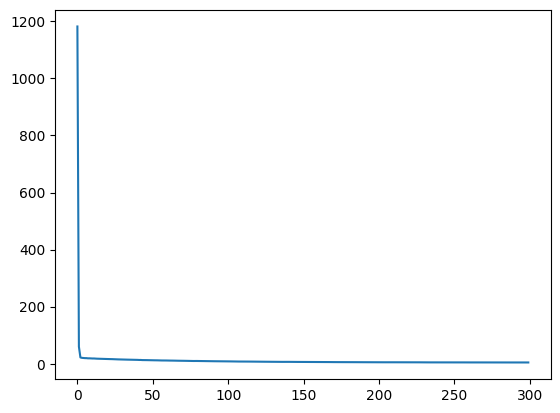

<IPython.core.display.Javascript object>

In [57]:
import matplotlib.pyplot as plt

plt.plot(model.history.history["loss"])

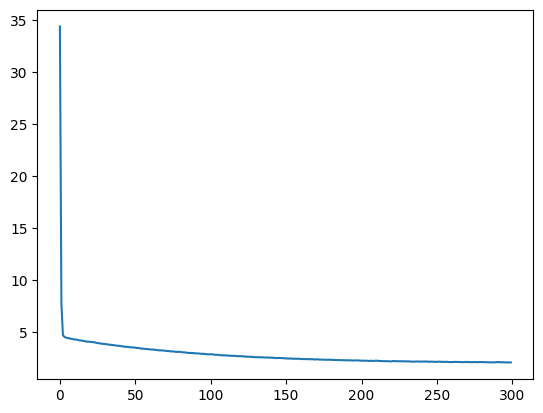

<IPython.core.display.Javascript object>

In [58]:
plt.plot(model.history.history["RMSE"])

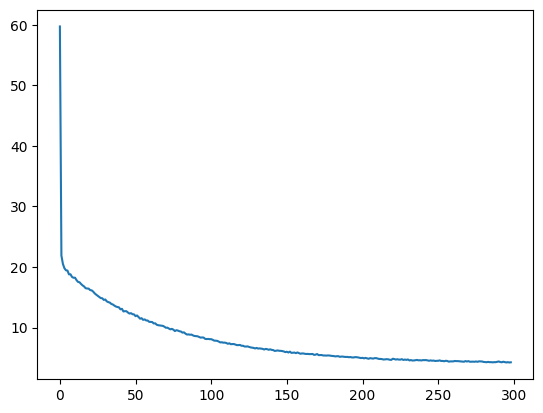

<IPython.core.display.Javascript object>

In [59]:
plt.plot(model.history.history["loss"][1:])

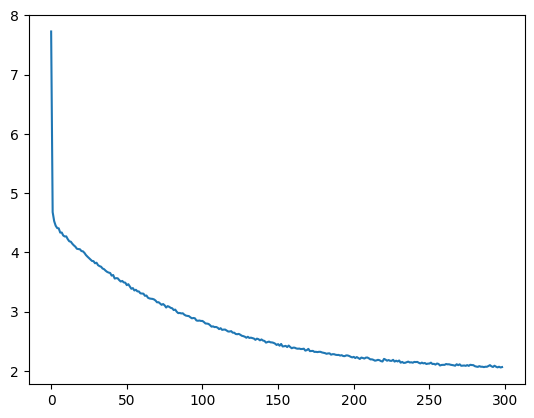

<IPython.core.display.Javascript object>

In [60]:
plt.plot(model.history.history["RMSE"][1:])

In [61]:
model.model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 256)               3840      
                                                                 
 batch_normalization_15 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_35 (Dropout)        (None, 256)               0         
                                                                 
 dense_72 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_16 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dense_73 (Dense)            (None, 64)              

<IPython.core.display.Javascript object>